In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('anemia.csv')

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
df.shape

(1421, 6)

In [7]:
df.isnull()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1416,False,False,False,False,False,False
1417,False,False,False,False,False,False
1418,False,False,False,False,False,False
1419,False,False,False,False,False,False


In [8]:
#checking the null values
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [9]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

Result
0    801
1    620
Name: count, dtype: int64


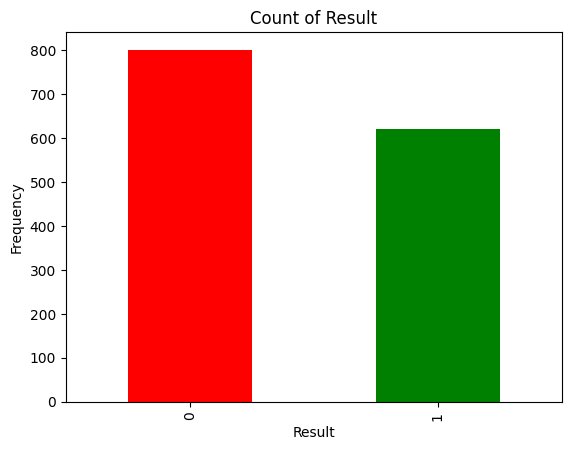

In [10]:
#0-not anemic 1-aenmic
#checking for the count of anemic and not anemic

results=df['Result'].value_counts()
print(results)

results.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [11]:
print(df['Gender'].value_counts())

Gender
1    740
0    681
Name: count, dtype: int64


In [12]:
#The female count is more then male count
#Balancing it using the undersampling

from sklearn.utils import resample
majorclass = df[df['Result']==0]
minorclass= df[df['Result']==1]

major_downsample=resample(majorclass, replace=False,n_samples=len(minorclass),random_state=42)

df=pd.concat([major_downsample,minorclass])

print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


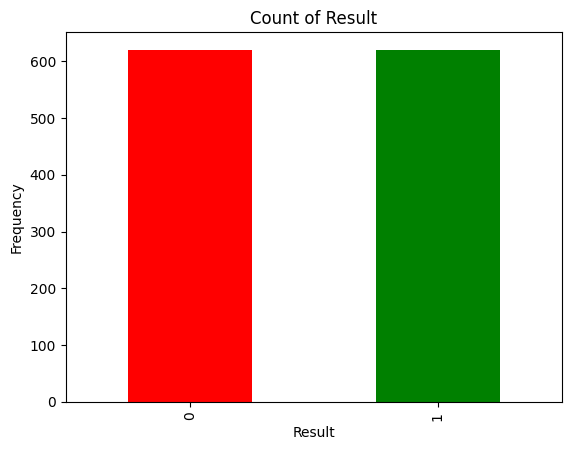

In [13]:
#plotting balanced Gender Count
result_balanced= df['Result'].value_counts()
result_balanced.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1240.0,0.540323,0.498573,0.0,0.0,1.0,1.000,1.0
Hemoglobin,1240.0,13.218145,1.976190,6.6,11.5,13.0,14.900,16.9
MCH,1240.0,22.903952,3.993624,16.0,19.4,22.7,26.200,30.0
MCHC,1240.0,30.277984,1.394515,27.8,29.1,30.4,31.500,32.5
MCV,1240.0,85.620968,9.673794,69.4,77.3,85.3,94.225,101.6
Result,1240.0,0.500000,0.500202,0.0,0.0,0.5,1.000,1.0


Gender
1    670
0    570
Name: count, dtype: int64


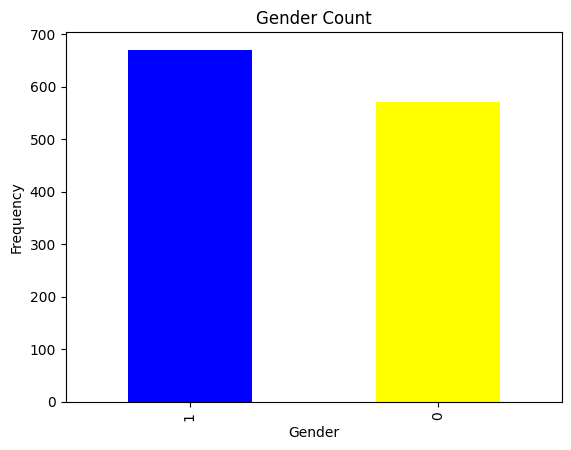

In [32]:
output= df['Gender'].value_counts()
print(output)
output.plot(kind='bar', color =['blue', 'yellow'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title("Gender Count")
plt.show()

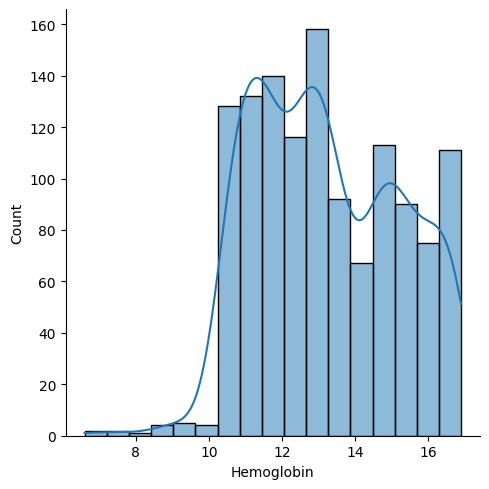

In [21]:
sns.displot(df['Hemoglobin'], kde=True)

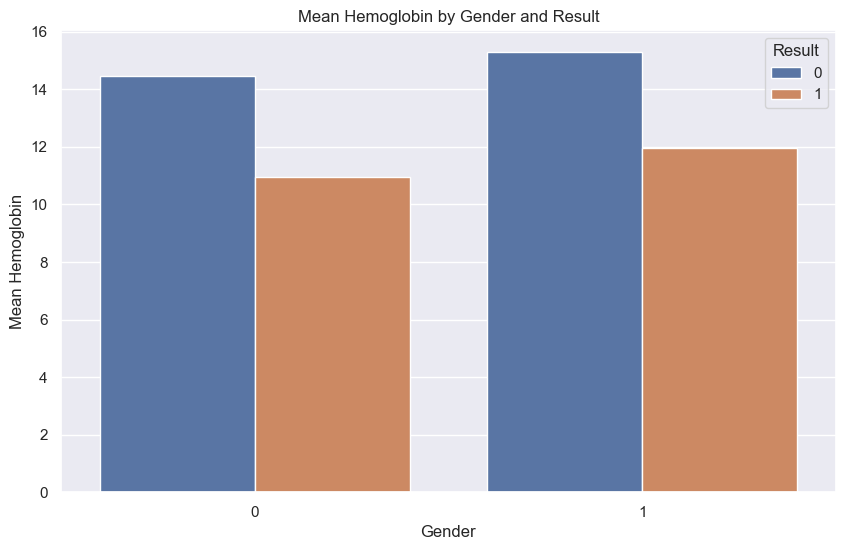

In [48]:
mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().reset_index()

# Plot the histogram
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Hemoglobin', hue='Result', data=mean_hemoglobin)
plt.title('Mean Hemoglobin by Gender and Result')
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin')
plt.legend(title='Result')
plt.show()

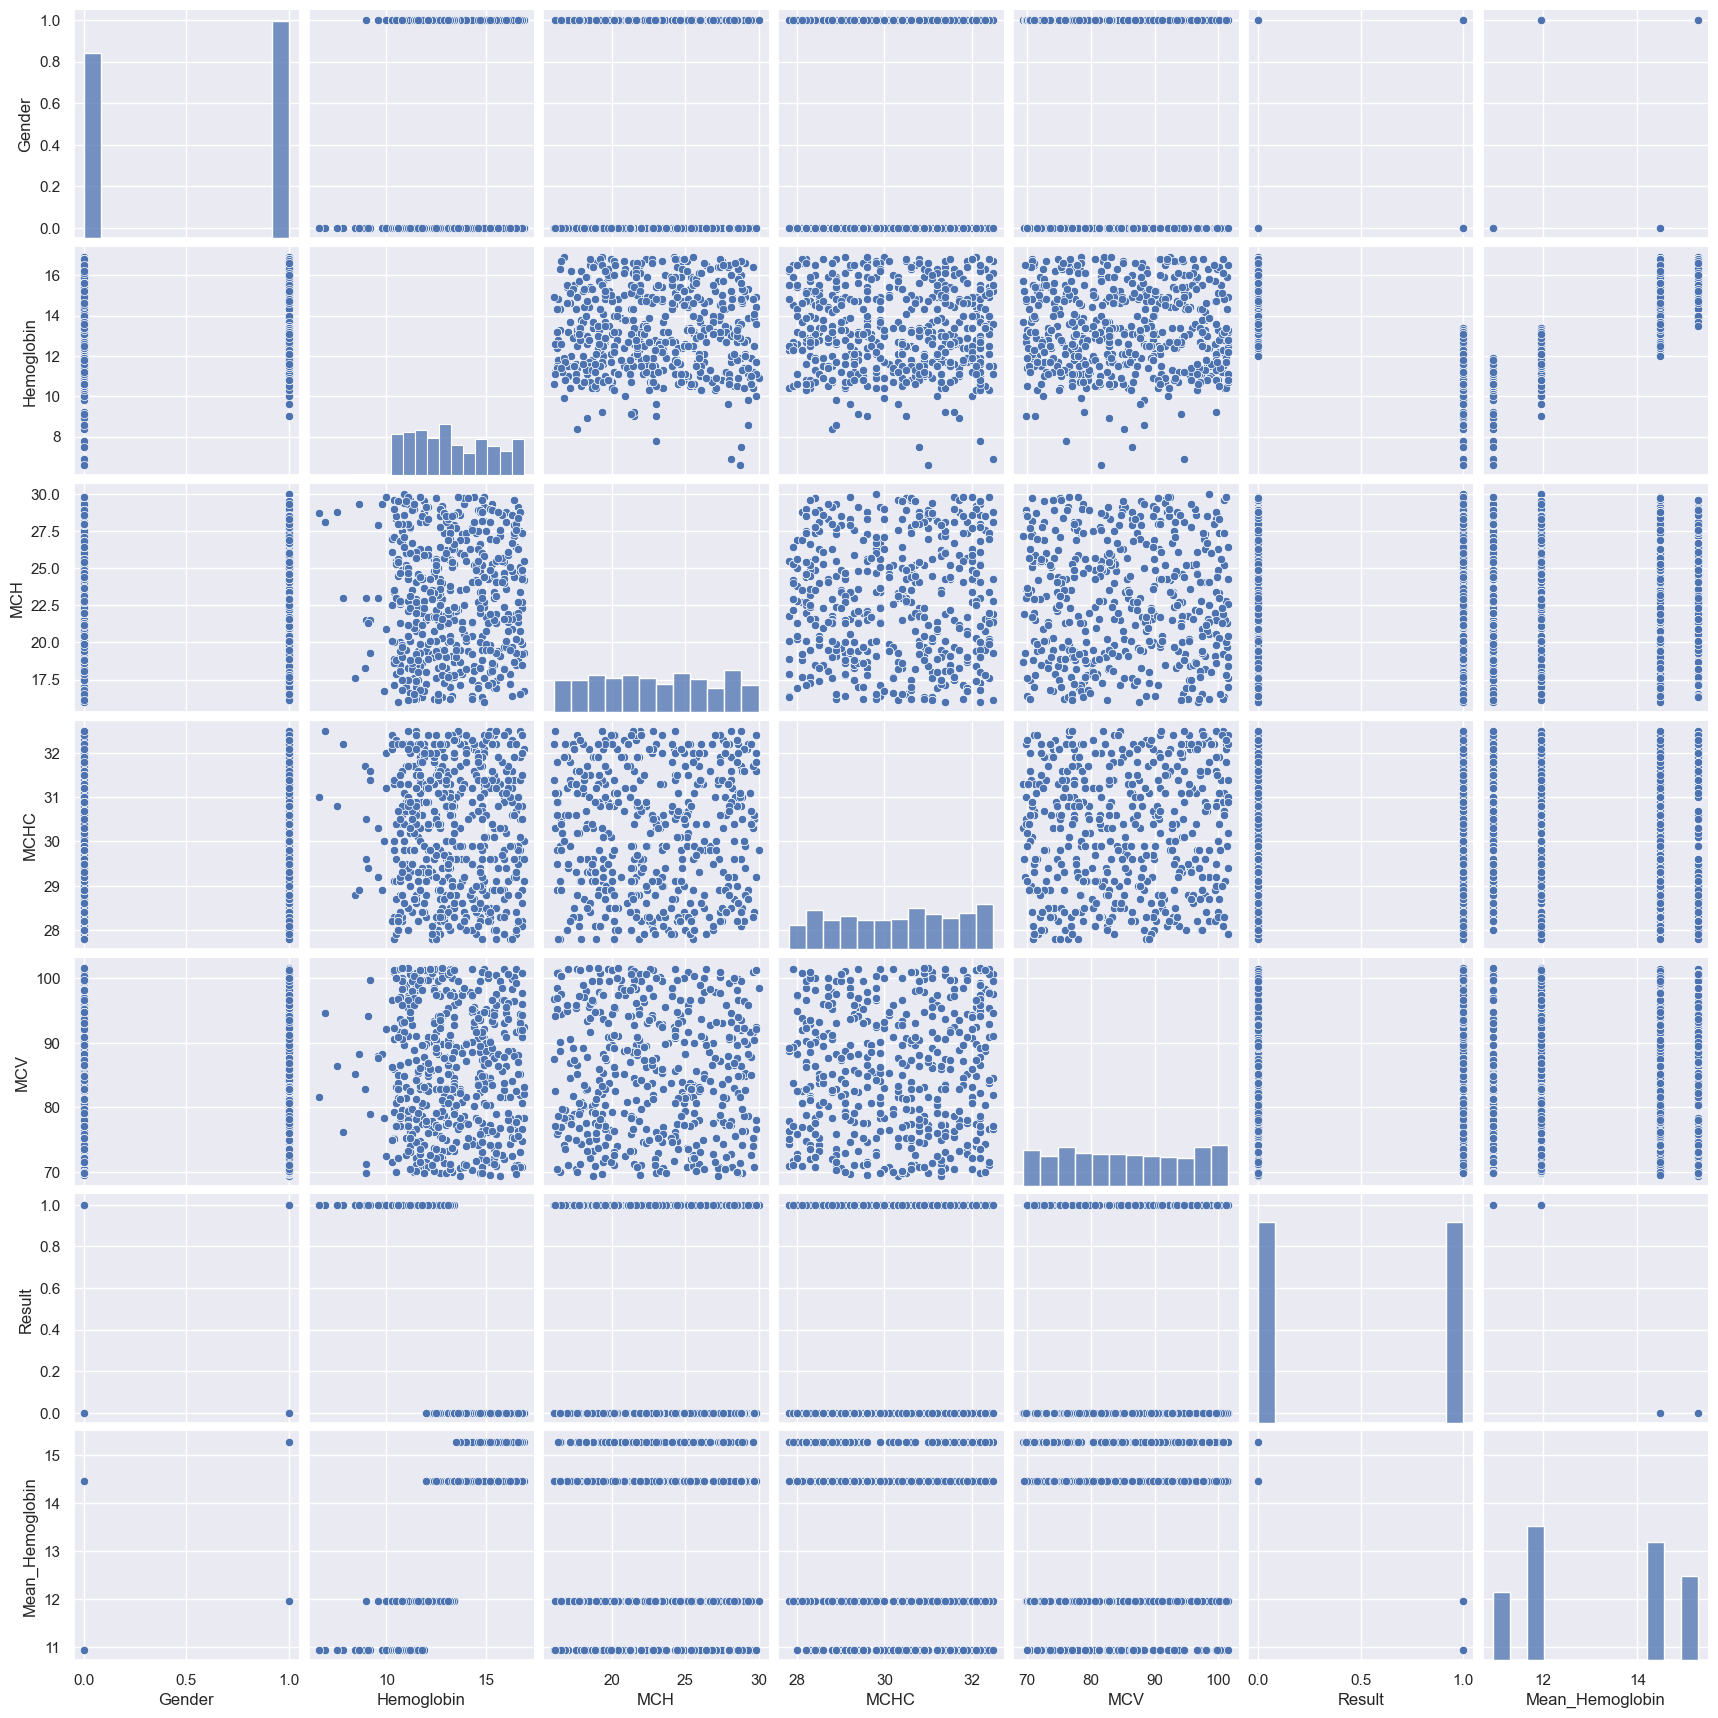

In [49]:
sns.pairplot(df)

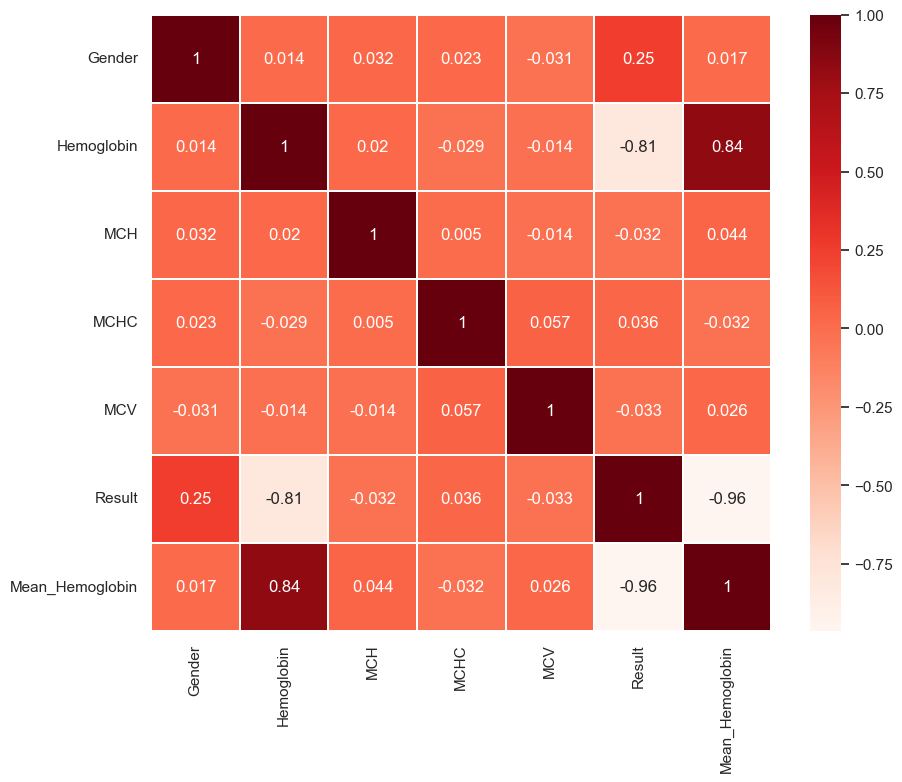

In [53]:
sns.heatmap(df.corr(),annot=True,cmap='Reds',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [54]:
#Splitting data into train and test
X=df.drop('Result',axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV,Mean_Hemoglobin
1234,1,16.6,18.8,28.1,70.9,15.284496
1188,0,15.3,18.3,30.4,93.4,14.471823
106,0,14.8,20.4,28.5,91.1,14.471823
954,0,14.6,16.9,31.9,78.1,14.471823
112,0,15.9,28.7,31.0,81.6,14.471823
...,...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2,11.965777
1416,0,10.6,25.4,28.2,82.9,10.953846
1417,1,12.1,28.3,30.4,86.9,11.965777
1418,1,13.1,17.7,28.1,80.7,11.965777


In [55]:
Y=df['Result']
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=20)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 6)
(248, 6)
(992,)
(248,)
